#**General Questions**

🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?

1) 

Character N-Grams it is split each words based on character but word N-Grams it is split whole text based on words.

Character N-grams split highlights some common properties that a word n-gram split does not.

Character N-grams split allows to identify interesting similarities across languages.

Character N-grams make languages more comparable revealing more repeated objects.

2)

Word n-gram tends to suffer more from OOV (Out-Of-Vocabulary) issue because of the new words that presented in the testing dataset and not appear in training dataset.

🌈 **What is the difference between stop word removal and stemming? Are these techniques language-dependent?**

1)Stop word removal and stemming are commonly used method in indexing.

* **Stop word removal** Some common words that are present in text but do not contribute in the meaning of a sentence. Such words are not at all important for the purpose of information retrieval or natural language processing. 

      For example: The most common stopwords are ‘the’ and ‘a’.

* **Stemming** is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. 
      For example: the stem of the words eating, eats, eaten is eat.

2) Yes, these techniques are language-dependent.

🌈 **Is tokenization techniques language dependent? Why?**

Tokenization is breaking the raw text into small chunks and helps in interpreting the meaning of the text by analyzing the sequence of the words so it is language dependent.

Because it needs to know meaning of each word to split it depend on language.
           
    For example: wasn't>> wasnt>>was n't>>wasn t >> these all possible of tokenization but some of these doesn't have meaning in the language.

🌈 **What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

1) *TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.*

* **CountVectorizer**: Counts the frequency of all words in our corpus, sorts them and grabs the most recurring features (using max_features hyperparameter). But these results are mostly biased and our model might loose out on some of the important less frequent features. These are all boolean values. 

      For example: SEO People used to take advantage of this.

* **TFIDFVectorizer**: TFIDF is a statistical measure said to have fixed the issues with CountVectorizer in some way. It consists of 2 parts, TF (Term Frequency) multiplied with IDF (Inverse Document Frequency). The main intuition being some words that appear frequently in 1 document and less frequently in other documents could be considered as providing extra insight for that 1 document and could help our model learn from this additional piece of information. In short, common words are penalized. These are relative frequencies identified as floating point numbers.

---

* In **CountVectorizer** we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

* In **TfidfVectorizer** we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

**Summary**: The main difference between the 2 implementations is that TfidfVectorizer performs both term frequency and inverse document frequency for you, while using TfidfTransformer will require you to use the CountVectorizer class from Scikit-Learn to perform Term Frequency.

---
2)

* It isn't feasible to use all possible n-grams.

- N-gram range sets if features to be used to characterize texts will be:Unigrams or words (n-gram size = 1)Bigrams or terms compounded by two words (n-gram size = 2)Trigrams or terms compounded by up to three words (n-gram size = 3).

- I should select between them depend on problem like :Sentiment Analysis, setting n-gram ranges that use bigrams or trigrams can dramatically improve the accuracy of classification,as they can capture more complex expressions formed by the composition of morethan one word. The rationale is that in Sentiment Analysis the outcome dependsnot only on the frequency of words but also on how they are combined:good has a different meaning alone than when preceded by a not as in not good.

#**Problem Questions**

✔️ Problem Formulation:

 * This is a binary text classification task. Containing a tabular dataset called ("Reddit Fake Post Detection (by Looking Only at the Title)") and the excepected goal from it to classify the output of a specific title whether it is fake or not based on some text preprocessing on our data.

 * It has 2 features as input (the title as 'text' column & id column) and 1 feature as output (label column), we are going to predict the probability (0-1, float) that the title will be fake news or not. So we can ML model that can better solve this problem.

 * The data mining function that we need in this problems is binary text classification and predictions models for classifying our data and predict the appropriate label.

 * The challenges are that the dataset has not any missing values & quite balanced, but has some duplicated data points we should remove. And we should apply some preprocessing techniques on dataset like cleaning text and feature extraction and tuned the appropriate model for this problem.

  * The impact of the product on real life help Reducing the spread of fake and false news by designing a model capable of differentiating between true and fake news with an acceptable accuracy, thus building an environment that is not supportive of misinformation and building trust with the general public.

  * The life cycle of data mining model to be able to predict the probability of output whether it is fake or not that:

        Problem understanding

        Data collection.

        Data preparation.

        Modeling. 

        Evaluation.

* What is an ideal solution?

   The ideal solution is to make the appropriate preprocessing on the text column for properly predicting the probability of right label.

What is the experimental protocol used and how was it carried out? What preprocessing steps are used?

  * The experimental protocol used is (Validation set) that is a set of data, separate from the training set, that is used to validate our model performance during training. This validation process gives information that helps us tune the model's hyperparameters and configurations accordingly.

               I splitted the whole data to train & validation with 20 % percentage for the validation and used it in Grid Search.


   * I also used (The Cross-validation) because it is usually the preferred method as it gives the model the opportunity to train on multiple train-test splits. This gives a better indication of how well the model will perform on unseen data.

 * The general procedure is as follows:
            Shuffle the dataset randomly.
            Split the dataset into k groups
            For each unique group:

            Take the group as a hold out or test data set
            Take the remaining groups as a training data set
            Fit a model on the training set and evaluate it on the test set
            Retain the evaluation score and discard the model

  * Summarize the skill of the model using the sample of model evaluation scores

* Preprocessing steps that I need:

      1) Removing duplicated data.

      2) Handling text column through applying some preprocessing steps on it.

#**Import libraries**

In [ ]:
import re
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
import nltk 
from bokeh.io import output_notebook
output_notebook()

from pathlib import Path

# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#**Import data**

In [ ]:
# Read train data
df = pd.read_csv('/content/drive/MyDrive/Reddit Fake Post Detection/xy_train.csv', sep=",", na_values=[""])
# Read test data
df2= pd.read_csv('/content/drive/MyDrive/Reddit Fake Post Detection/x_test.csv', sep=",", na_values=[""])

#**Data Exploration**

In [ ]:
#Drop id column from train data
df.drop('id',axis=1,inplace=True)
#Display the first 5 rows of train data
df.head()

,text,label
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0


In [ ]:
#The first title in train data
df['text'][0]

'A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Seeing another person who鈥檚 also in need, you should just naturally be like, 鈥業 want to help that person.鈥?\t0.84\t1\t0\t0\nNeoMegaRyuMKII\tdenmark just trolled trump with a bus watch what happens when it moves\t1489962542.0\tarchive.is\tTrue\t60cu90\thttps://external-preview.redd.it/s8HQxoWDwn2pt3eeBjIqetmGxvVMBBxaD93W08lGZrs.jpg?width=320&crop=smart&auto=webp&s=46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t5.0\t36\tsavedyouaclick\tDenmark Just Trolled Trump With A Bus. Watch What Happens When It Moves | Back wheels look like eyes that spin crazily as the bus moves (saved a click + short video that goes into slow motion (video mirror in comments since archive removed it))\t0.92\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t1429563057.0\t\tTrue\tcqiw655\thttp://i.imgur.com/rxTKm4U.jpg\t338ute\t\t6\tpsbattle_artwork\tYoung man, there\'s no need to feel down\t\t0\t2\t4\nbeosronlto

In [ ]:
#shape of train data
df.shape

(60000, 2)

In [ ]:
#number of unique values in each column in train data
df.nunique()

text     59645
label        3
dtype: int64

In [ ]:
#count of unique values in label column
df['label'].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

**Observation:** Label 2 has no meaning in our problem here (outliers) so we should remove data points that contain this label later because we have label 1 indiates fake news and label 0 indicates not fake news.

In [ ]:
#drop data points that contain label 2
df.drop(df.loc[df["label"]==2].index,inplace=True)

In [ ]:
# Distribution of labels
df["label"].value_counts(normalize=True)

0    0.538281
1    0.461719
Name: label, dtype: float64

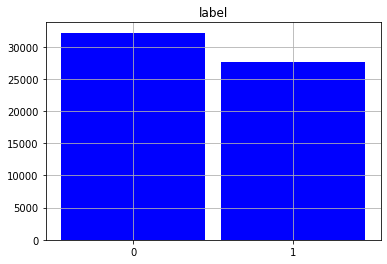

In [ ]:
# Class balance analysis
df[['label']].hist(bins = 3)
plt.bar(np.arange(len([0,1])), df.groupby(['label']).size().values, 0.9,  color="blue")
plt.xticks(np.arange(len([0,1])), [0,1])
plt.show()

**Observation:** From the plot we see that we have balanced data.

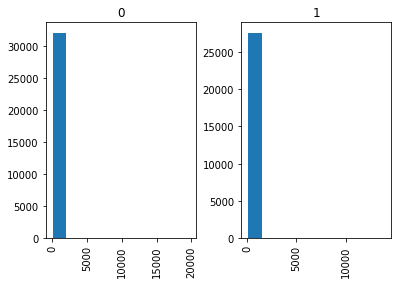

In [ ]:
#  the number of characters present in each title by labels
df['text'].str.len().hist(by=df['label']);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1def5427d0>,
      dtype=object)

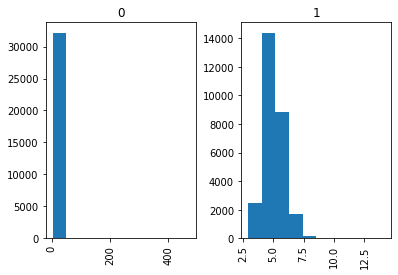

In [ ]:
# Word level analysis of title
df['text'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df['label'])

In [ ]:
#Shape of train data after removing data points that contain label 2
df.shape

(59768, 2)

In [ ]:
#check for duplicated data
df.duplicated().sum()

345

**Observation:** We have 345 duplicated data points.

In [ ]:
#drop duplicated data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**Observation:** Now we have no duplicated data.

In [ ]:
#shape of train data after we remove duplicated data
df.shape

(59423, 2)

In [ ]:
#chack for missing values
df.isnull().sum()

text     0
label    0
dtype: int64

**Observation:** We have no missing values in our data

#**Working on data**

We'll focus on the titles amd the labels, which have value 1 for fake news and 0 for true ones. The titles are mostly written in proper English with some outliers from Chinese language using punctuation and have image and websites links and don't include emojis. However, as with any real life text data there will be slang, grammatical mistakes, misspellings etc. Also, in some places we find html tags like <br />. Nonetheless, compared to data from Facebook or Twitter this is mostly harmless and probably won't pose too many issues for us. We will deal with all of that in the next step.

* **I will apply two different cleaning functions on data and see the results of each of them**

###**First cleaning Function**

In [ ]:
#Building function for Cleaning the dataset
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))


def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    clean_text = " ".join(words_filtered)
    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The (clean_text) function takes a string input and applies a bunch of manipulations to it (described in the code).

In [ ]:
#try the first cleaning function on an example
clean_text("Python is ; \ the best Programming language.")

'python best program languag'

###**Second cleaning Function**

In [ ]:
#Building function for Cleaning the dataset
def different_clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords and punctuation
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    clean_text = " ".join(words_tokens_lower)
    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The (different_clean_text) function takes a string input and applies a bunch of manipulations to it (described in the code).

In [ ]:
#try the first cleaning function on an example
different_clean_text("Python is ; \ the best Programming language.")

'python is the best programming language'

###**Applying the first clean function on train & test data**

In [ ]:
#applying the first cleaning function on train data 
#and put the output of this cleaning process in new column("clean_text")
%%time
# Clean text in train data (24 s)
df["clean_text"] = df.loc[df["text"].str.len() > 0, "text"]
df["clean_text"] = df["clean_text"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 21.5 s, sys: 3.27 ms, total: 21.5 s
Wall time: 21.6 s


In [ ]:
#applying the first cleaning function on test data 
#and put the output of this cleaning process in new column("clean_text")
%%time
# Clean text in test data (13 s)
df2["clean_text"] = df2.loc[df2["text"].str.len() > 0, "text"]
df2["clean_text"] = df2["clean_text"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 11.6 s, sys: 23 ms, total: 11.6 s
Wall time: 11.7 s


###**Applying the second clean function on train & test data**

In [ ]:
#applying the second cleaning function on train data 
#and put the output of this cleaning process in new column("different_clean_text")
%%time
# Clean text in train data (24 s)
df["different_clean_text"] = df.loc[df["text"].str.len() > 0, "text"]
df["different_clean_text"] = df["different_clean_text"].map(
    lambda x: different_clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 9.09 s, sys: 43.7 ms, total: 9.13 s
Wall time: 9.48 s


In [ ]:
#applying the second cleaning function on test data 
#and put the output of this cleaning process in new column("different_clean_text")
%%time
# Clean text in test data (13 s)
df2["different_clean_text"] = df2.loc[df2["text"].str.len() > 0, "text"]
df2["different_clean_text"] = df2["different_clean_text"].map(
    lambda x: different_clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

CPU times: user 6.46 s, sys: 36.4 ms, total: 6.5 s
Wall time: 6.51 s


These steps conclude the cleaning and pre processing. In result, we get this:

###**Display the head of train & test data after applying the cleaning functions.**

In [ ]:
#display the five row fron train data after adding clean text column
df.head()

,text,label,clean_text,different_clean_text
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0,group friend began volunt homeless shelter neighbor protest see anoth person also need natur lik...,group of friends began to volunteer at homeless shelter after their neighbors protested seeing a...
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0,british prime minist theresa may nerv attack former russian spi govern conclud high like russia ...,british prime minister theresa may on nerve attack on former russian spy the government has conc...
2,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0,goodyear releas kit allow ps brought heel https youtub com watch alxulk cg zwillc fish midatlant...,in goodyear released kit that allows ps to be brought to heel https youtube com watch alxulk cg ...
3,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0,happi birthday bob barker price right host like rememb man said ave pet spay neuter fuckincorpor...,happy birthday bob barker the price is right host on how he like to be remembered as the man who...
4,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0,obama nation innoc cop unarm young black men die magic johnson jimbobshawobodob olymp athlet sho...,obama to nation innocent cops and unarmed young black men should not be dying before magic johns...


In [ ]:
#display the five row fron test data after adding clean text column
df2.head()

,id,text,clean_text,different_clean_text
0,0,stargazer,stargaz,stargazer
1,1,yeah,yeah,yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video,pd phoenix car thief get instruct youtub video,pd phoenix car thief gets instructions from youtube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility",trump accus iran one problem credibl,as trump accuses iran he has one problem his own credibility
4,4,"""Believers"" - Hezbollah 2011",believ hezbollah,believers hezbollah


In [ ]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df["clean_text"]).split()).value_counts()
word_freq[1:30]

one         3274
like        3119
new         2974
look        2841
color       2725
man         2718
get         2593
trump       2552
say         2322
peopl       2311
use         2302
first       2232
make        2222
old         2216
time        2018
poster      1999
found       1997
day         1926
war         1851
post        1614
world       1565
work        1527
show        1507
us          1496
american    1489
take        1482
life        1478
psbattl     1469
help        1439
dtype: int64

In [ ]:
# list most uncommon words
word_freq[-10:].reset_index(name="freq")

,index,freq
0,valdiserri,1
1,miku,1
2,hatsun,1
3,nfler,1
4,hicock,1
5,mccall,1
6,angriff,1
7,kutemey,1
8,ollow,1
9,wahr,1


#**Analyzer(Word)**


In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<5 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
vectorizer_word = TfidfVectorizer( analyzer="word", max_df=0.3, min_df=5, ngram_range=(1, 2), norm="l2")
vectorizer_word.fit(df["clean_text"])

TfidfVectorizer(max_df=0.3, min_df=5, ngram_range=(1, 2))

In [ ]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer_word.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 asphalt            950
littl brother    10301
german invad      6976
allow see          385
alien              350
dtype: int64


#**Analyzer(Char)**


In [ ]:
"""
Compute unique char vector with frequencies
exclude very uncommon (<5 obsv.) and common (>=30%) char
use pairs of two words (ngram)
"""
vectorizer_char = TfidfVectorizer( analyzer="char", max_df=0.3, min_df=5, ngram_range=(1, 2), norm="l2")
vectorizer_char.fit(df["clean_text"])

TfidfVectorizer(analyzer='char', max_df=0.3, min_df=5, ngram_range=(1, 2))

In [ ]:
# Vector representation of vocabulary
char_vector = pd.Series(vectorizer_char.vocabulary_).sample(5, random_state=1)
print(f"Unique char (ngram) vector extract:\n\n {char_vector}")

Unique char (ngram) vector extract:

 y     618
gm    174
ge    166
kw    286
tr    500
dtype: int64


#**Splitting Data**

In [ ]:
#split data to features(X) & Label(y)
X = df['clean_text']
X_2 = df['different_clean_text']
Y = df['label'] 

In [ ]:
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2022, shuffle=True)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train (new training set), X
split_index = [-1 if x in X_train.index else 0 for x in X.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

print(X_train.shape)
print(X_test.shape)

(47538,)
(11885,)


#**For Example: When applying word analyzer**

In [ ]:
# transform each sentence to numeric vector with tf-idf value as elements
X_train_vec = vectorizer_word.transform(X_train)
X_test_vec = vectorizer_word.transform(X_test)
train_vec = vectorizer_word.transform(X)
test_vec = vectorizer_word.transform(df2['clean_text'])
test_vec_2 = vectorizer_word.transform(df2['different_clean_text'])

print(X_train_vec.get_shape())
print(test_vec.get_shape())

(47538, 21006)
(59151, 21006)


In [ ]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train[3:4].values}\n")
# Feature Matrix
features = pd.DataFrame(
    X_train_vec[3:4].toarray(), columns=vectorizer_word.get_feature_names_out()
)
nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['chanc get hand bone muslim allegi lie']

Vector representation of sentence:
      allegi      bone    chanc  chanc get       get  get hand      hand  \
0  0.400142  0.333481  0.30195   0.435792  0.183692  0.425982  0.235193   

        lie    muslim  
0  0.299905  0.295173  


#**For Example: When applying char analyzer**

In [ ]:
# transform each sentence to numeric vector with tf-idf value as elements
X_train_vec = vectorizer_char.transform(X_train)
X_test_vec = vectorizer_char.transform(X_test)
train_vec = vectorizer_char.transform(X)
test_vec = vectorizer_char.transform(df2['clean_text'])
test_vec_2 = vectorizer_char.transform(df2['different_clean_text'])


print(X_train_vec.get_shape())
print(test_vec.get_shape())

(47538, 673)
(59151, 673)


In [ ]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train[3:4].values}\n")
# Feature Matrix
features = pd.DataFrame(
    X_train_vec[3:4].toarray(), columns=vectorizer_char.get_feature_names_out()
)
nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['chanc get hand bone muslim allegi lie']

Vector representation of sentence:
          bo        c         eg        et        ge        gi        ha  \
0  0.237544  0.206579  0.294943  0.185989  0.223945  0.272964  0.416541   

         ie        im        ll        m         mu        nc        sl  \
0  0.234799  0.237526  0.186083  0.198438  0.296463  0.237275  0.338145   

         us  
0  0.192518  


#**Model(1): LogReg + (analyzer='word')  with (Grid Search) using (Validation set)**

*After we removed the words that are less important for analysis, hence that is making the model building less complex by reducing the input dimensions, we will choose the appropriate model for the task.*

**Model is:** Logistic regression 
* As it is a simple yet very effective classification algorithm so it is commonly used for many binary classification tasks.

* LogisticRegression 's important hyperparameters that we used here:

      1)**C**, default=1.0, is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data

      2) **solver**{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’. 
      Algorithm to use in the optimization problem. 

      3) **max_iterint**, default=100
      Maximum number of iterations taken for the solvers to converge.



**TfidfVectorizer:**

* TF-IDF enables us to gives us a way to associate each word in a document with a number that represents how relevant each word is in that document. Then, documents with similar, relevant words will have similar vectors, which is what we are looking for in a machine learning algorithm.

* It is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

* It is better that TF. Word2Vec can be directly used to assign vector to a word but to get the vector representation of a document further processing is needed. Unlike TF-IDF Word2Vec takes into account placement of words in a document(to some extent).

* **Hint: Output Term Frequency-Inverse Document Frequency matrix, specified as a sparse matrix or a cell array of sparse matrices.**

* It has some important hyperparameters that we used in tuning that they are:

      1) **max_df** When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). (remove more frequent words)

      2) **min_df** When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature.(remove more rare words)

      3) **ngram_range** tuple (min_n, max_n), default=(1, 1)
      The lower and upper boundary of the range of n-values for different n-grams to be extracted.

      4) **analyzer** {‘word’, ‘char’, ‘char_wb’}, default=’word’
      Whether the feature should be made of word or character n-grams. 


**Pipeline:** we used a pipeline that provides a way to automate a machine learning workflow. It chained TfidfVectorizer & our model together.

**Here what did we use ⁉**

- word analyzer 
- ngram_range(1,2): means unigrams and bigrams.
- max_df : range between (.1:1).
- min_df : range between (5:15) with step 5.
 
 **We keep everything between max_df and min_df**
- C : range between (.6:.9)
- max_iter: 2 values(180,200) larger than the default value(100) to help the solver to converge.
- random_state : (set to 42) to shuffle the data.

- Grid Search using Validation set.

**I suggest Logistic Regression model will work well with this problem with high accuracy.**

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LogReg", LogisticRegression(random_state=42))])

# define parameter space to test # runtime 49min
params = {
     "tfidf__analyzer":['word'],
     "tfidf__ngram_range": [(1, 2)],
     "tfidf__max_df": np.arange(0.1, 1,.1),
    "tfidf__min_df": np.arange(5,15,5),
     "LogReg__C": [.6,.7,.8,0.9],  
     "LogReg__max_iter":[180,200]    
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= pds ,verbose=1)
pipe_clf.fit(X, Y)

Fitting 1 folds for each of 144 candidates, totalling 144 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'LogReg__C': [0.6, 0.7, 0.8, 0.9],
                         'LogReg__max_iter': [180, 200],
                         'tfidf__analyzer': ['word'],
                         'tfidf__max_df': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tfidf__min_df': array([ 5, 10]),
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'LogReg__C': 0.9, 'LogReg__max_iter': 180, 'tfidf__analyzer': 'word', 'tfidf__max_df': 0.1, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


**Observation:** the above cell returned the best hyperparametered with validation set using GridSearch .

* max_df = 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, it did not ignore any terms.

* min_df = 5 , which means "ignore terms that appear in less than 5 documents".

* Smaller value of C specify stronger regularization. 




In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     31955
           1       0.83      0.83      0.83     27468

    accuracy                           0.85     59423
   macro avg       0.84      0.84      0.84     59423
weighted avg       0.85      0.85      0.85     59423



**Observation:** it achieved 85% on whole training data.

#**Model(2): LogReg + (analyzer='char')  with (Grid Search) using (Validation set)**

**Here what did we use ⁉**

- char analyzer with the same hyperparameters as the previous trial.
- Grid Search using Validation set.

**I suggest Logistic Regression model will work worser than the previous trial as here it use char analyzer that care less about the meaning of context**

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LogReg", LogisticRegression(random_state=42))])

# define parameter space to test # runtime 49min
params = {
     "tfidf__analyzer":['char'],
     "tfidf__ngram_range": [(1, 2)],
     "tfidf__max_df": np.arange(0.1, 1,.1),
    "tfidf__min_df": np.arange(5,15,5),
     "LogReg__C": [.6,.7,.8,0.9],  
     "LogReg__max_iter":[180,200]     
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= pds ,verbose=1)
pipe_clf.fit(X, Y)

Fitting 1 folds for each of 144 candidates, totalling 144 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'LogReg__C': [0.6, 0.7, 0.8, 0.9],
                         'LogReg__max_iter': [180, 200],
                         'tfidf__analyzer': ['char'],
                         'tfidf__max_df': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tfidf__min_df': array([ 5, 10]),
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'LogReg__C': 0.9, 'LogReg__max_iter': 180, 'tfidf__analyzer': 'char', 'tfidf__max_df': 0.7000000000000001, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


**Observation:** the above cell returned the best hyperparametered with validation set using GridSearch .

* max_df = .7, means "ignore terms that appear in more than 70% of the documents".

* min_df = 5 , which means "ignore terms that appear in less than 5 documents".

* Smaller value of C specify stronger regularization.

In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     31955
           1       0.66      0.61      0.63     27468

    accuracy                           0.67     59423
   macro avg       0.67      0.67      0.67     59423
weighted avg       0.67      0.67      0.67     59423



**Observation:** it achieved 67% on whole training data.

 which indicated that word analyzer is better in this case.

#**Model(3): LogReg + (analyzer='word')  with (Grid Search) using (Cross Validation)**

**Here what did we use ⁉**

- word analyzer with the same hyperparameters as the previous trial.
- Grid Search using Cross Validation (cv=3).

**I suggest Logistic Regression model will work as same as the first trial as it use word analyzer with same hyperparameters but the difference (using cv=3 instead of validation set) is small**

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LogReg", LogisticRegression(random_state=42))])

# define parameter space to test # runtime 49min
params = {
     "tfidf__analyzer":['word'],
     "tfidf__ngram_range": [(1, 2)],
     "tfidf__max_df": np.arange(0.1, 1,.1),
    "tfidf__min_df": np.arange(5,15,5),
     "LogReg__C": [.6,.7,.8,0.9],  
     "LogReg__max_iter":[180,200]    
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= 3 ,verbose=1)
pipe_clf.fit(X, Y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'LogReg__C': [0.6, 0.7, 0.8, 0.9],
                         'LogReg__max_iter': [180, 200],
                         'tfidf__analyzer': ['word'],
                         'tfidf__max_df': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tfidf__min_df': array([ 5, 10]),
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'LogReg__C': 0.9, 'LogReg__max_iter': 180, 'tfidf__analyzer': 'word', 'tfidf__max_df': 0.1, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


**Observation:** Greattt, it worked as we expected and chosed the same hyperparameters using the grid search.

In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     31955
           1       0.83      0.83      0.83     27468

    accuracy                           0.85     59423
   macro avg       0.84      0.84      0.84     59423
weighted avg       0.85      0.85      0.85     59423



**Observation:** it achieved 85% on whole training data.

#**Model(4): LogReg + (analyzer='char')  with (Grid Search) using (Cross Validation)**

**Here what did we use ⁉**

- char analyzer with the same hyperparameters as the previous trial.
- Grid Search using Cross Validation (cv=3).

**I suggest Logistic Regression model will work as same as the second trial as it use char analyzer with same hyperparameters but the difference (using cv=3 instead of validation set) is small**

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LogReg", LogisticRegression(random_state=42))])

# define parameter space to test # runtime 49min
params = {
     "tfidf__analyzer":['char'],
     "tfidf__ngram_range": [(1, 2)],
     "tfidf__max_df": np.arange(0.1, 1,.1),
    "tfidf__min_df": np.arange(5,15,5),
     "LogReg__C": [.6,.7,.8,0.9],  
     "LogReg__max_iter":[180,200]    
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= 3 ,verbose=1)
pipe_clf.fit(X, Y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'LogReg__C': [0.6, 0.7, 0.8, 0.9],
                         'LogReg__max_iter': [180, 200],
                         'tfidf__analyzer': ['char'],
                         'tfidf__max_df': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tfidf__min_df': array([ 5, 10]),
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'LogReg__C': 0.9, 'LogReg__max_iter': 180, 'tfidf__analyzer': 'char', 'tfidf__max_df': 0.7000000000000001, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


**Observation:** Greattt, it worked as we expected and chosed the same hyperparameters using the grid search as second trial.

In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     31955
           1       0.66      0.61      0.63     27468

    accuracy                           0.67     59423
   macro avg       0.67      0.67      0.67     59423
weighted avg       0.67      0.67      0.67     59423



**Observation:** it achieved 67% on whole training data.

#**Model(5): LogReg + (analyzer='word') with (Grid Search) using (Cross Validation)** different hyperparameter

**Here what did we use ⁉**

- word analyzer with different hyperparameters that they are:
- word analyzer 
- ngram_range(1,2): means unigrams and bigrams.
- max_df : range between (.1:.4).
- min_df : range between (5:15) with step 5.
 
 **We keep everything between max_df and min_df**
- C : np.logspace(-5, 5, 10)
- max_iter: value(200) larger than the default value(100) to help the solver to converge.
- random_state : (set to 42) to shuffle the data.

- Grid Search using Cross Validation (cv=2).

**I suggest the accuracy will enhance than the previous trials with these different hyperparameters espicially in C values.**

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("LogReg", LogisticRegression(random_state=42))])

# define parameter space to test # runtime 40min
params = {
    "tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": np.arange(0.1, .4,.1),
    "tfidf__min_df": np.arange(5,15,5),
    "LogReg__C": np.logspace(-5, 5, 10),  
    "LogReg__max_iter":[200]    
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= 2 ,verbose=1)
pipe_clf.fit(X,Y)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'LogReg__C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'LogReg__max_iter': [200],
                         'tfidf__max_df': array([0.1, 0.2, 0.3, 0.4]),
                         'tfidf__min_df': array([ 5, 10]),
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'LogReg__C': 3.593813663804626, 'LogReg__max_iter': 200, 'tfidf__max_df': 0.1, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


**Observation:** the above cell returned the best hyperparametered with validation set using GridSearch .

* max_df = 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, it did not ignore any terms.

* min_df = 5 , which means "ignore terms that appear in less than 5 documents".


In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     31955
           1       0.87      0.87      0.87     27468

    accuracy                           0.88     59423
   macro avg       0.88      0.88      0.88     59423
weighted avg       0.88      0.88      0.88     59423



**Observation:** The accuracy got better with increasing the value of C to become 88%.

#**Model(6): XGBoost + (analyzer='word')  with (Random Search) using (Cross Validation)**

**Model:** XGBoost
* XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process. The most important factor behind the success of XGBoost is its scalability in all scenarios.

* It can be used for text classification.

* XGBoost 's important hyperparameters that we used here:

      1) **learning_rate** parameter can be set to control the weighting of new trees added to the model.

      2) **n_estimators** is the number of trees 

      3) **max_depth** The maximum depth that you allow the tree to grow to. 

**Here what did we use ⁉**

- word analyzer 
- ngram_range(1,2): means unigrams and bigrams.
- max_df : range between (.3:.8).
- min_df : range between (5:20) with step 5.
 
 **We keep everything between max_df and min_df**
- learning_rate :[.001,.001,.1]
- n_estimators: [200,300,400] 
- random_state : (set to 42) to shuffle the data.
- max_depth: [3,6,10]

- Random Search using Cross Validation( cv=2).

**I expect that the model can give quite good accuracy as it suitable for this kind of problems.**

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("XGB", XGBClassifier(random_state=42))])

# define parameter space to test 
params = {
     "tfidf__ngram_range": [(1, 2)],
     "tfidf__max_df": np.arange(0.3, 0.8,.1),
     "tfidf__min_df": np.arange(5,20,5),
     "XGB__max_depth": [3,6,10],  
     "XGB__learning_rate":[.001,.001,.1],
     "XGB__n_estimators": [200,300,400]    
}
pipe_clf = RandomizedSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= 2 ,verbose=1)
pipe_clf.fit(X, Y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('XGB',
                                              XGBClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'XGB__learning_rate': [0.001, 0.001,
                                                               0.1],
                                        'XGB__max_depth': [3, 6, 10],
                                        'XGB__n_estimators': [200, 300, 400],
                                        'tfidf__max_df': array([0.3, 0.4, 0.5, 0.6, 0.7]),
                                        'tfidf__min_df': array([ 5, 10, 15]),
                                        'tfidf__ngram_range': [(1, 2)]},
                   scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 5, 'tfidf__max_df': 0.4, 'XGB__n_estimators': 300, 'XGB__max_depth': 10, 'XGB__learning_rate': 0.1}


**Observation:** We can see that the best result observed was a learning rate of 0.1 with 300 trees.

In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     31955
           1       0.83      0.82      0.82     27468

    accuracy                           0.84     59423
   macro avg       0.84      0.84      0.84     59423
weighted avg       0.84      0.84      0.84     59423



**Observation:** it achieved 84% on whole training data. we observe that the model is good for this kind of problems and provide good accuracy and it would increase if we used grid search instead of random search.

#**Model(7): RF + (analyzer='word') with (Grid Search) using (Cross Validation)**

I will use Random forest model with the different cleaning function on input and chech the change in accuracy and i expect to increase

In [ ]:
# feature creation and modelling in a single function
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("RF", RandomForestClassifier( max_depth=10))])

# define parameter space to test # runtime 40min
params = {
     "tfidf__ngram_range": [(1, 2)],
     "tfidf__max_df": np.arange(0.3, 0.5,.1),
     "tfidf__min_df": np.arange(5,15,5),
     "RF__n_estimators":[300 ,350]  
}
pipe_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="roc_auc", cv= 3 ,verbose=1)
pipe_clf.fit(X, Y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('RF',
                                        RandomForestClassifier(max_depth=10))]),
             n_jobs=-1,
             param_grid={'RF__n_estimators': [300, 350],
                         'tfidf__max_df': array([0.3, 0.4]),
                         'tfidf__min_df': array([ 5, 10]),
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='roc_auc', verbose=1)

In [ ]:
#display the best parameters
best_params = pipe_clf.best_params_
print(best_params)

{'RF__n_estimators': 350, 'tfidf__max_df': 0.3, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


**Observation:** we can see that the best number of trees used is 350 tree with max_df equal to .3 and min_df equal to 50%.

In [ ]:
# run pipe with optimized parameters
pipe.set_params(**best_params).fit(X, Y)
pipe_pred = pipe.predict(X)
report = sklearn.metrics.classification_report(Y, pipe_pred)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.99      0.72     31955
           1       0.91      0.13      0.23     27468

    accuracy                           0.59     59423
   macro avg       0.74      0.56      0.48     59423
weighted avg       0.73      0.59      0.50     59423



**Observation:** it gave me test accuracy on kaggle equal to 87% which is the best accuracy achieved so random forest model is the best model out of the three models we tried.

#**Submission file**

In [ ]:
submission = pd.DataFrame()
submission['id'] = df2['id']
submission['label'] = pipe.predict_proba(df2['clean_text'])[:, 1]

submission.to_csv('logreg.csv', index=False)